Alcohol Consumption vs. Annual Working Hours - all overlapping countries

In [1]:
#import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#read file from raw data folder 
csvpath = os.path.join("../Data/Alcohol_consumption/Alcohol_consumption.csv")
drink_df = pd.read_csv(csvpath)
drink_df.head()

,Unnamed: 0,Unnamed: 1,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) with 95%CI","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) with 95%CI.1","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) with 95%CI.2"
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,0.2 [0.2-0.2],0.4 [0.4-0.4],0 [0-0]
2,Afghanistan,2010,0.2 [0.2-0.3],0.4 [0.4-0.5],0 [0-0]
3,Albania,2016,7.5 [7.1-7.8],12.5 [12-13.1],2.6 [2.5-2.7]
4,Albania,2010,7.9 [7.6-8.2],13 [12.4-13.5],2.8 [2.7-3]


In [3]:
#rename columns for easier reading 
drink_df.columns=["Country","Year","Alcohol consumption both sexes","Alcohol consumption males","Alcohol consumption females"]
drink_df

,Country,Year,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,0.2 [0.2-0.2],0.4 [0.4-0.4],0 [0-0]
2,Afghanistan,2010,0.2 [0.2-0.3],0.4 [0.4-0.5],0 [0-0]
3,Albania,2016,7.5 [7.1-7.8],12.5 [12-13.1],2.6 [2.5-2.7]
4,Albania,2010,7.9 [7.6-8.2],13 [12.4-13.5],2.8 [2.7-3]
...,...,...,...,...,...
384,Yemen,2010,0.2 [0.2-0.2],0.4 [0.4-0.4],0.1 [0-0.1]
385,Zambia,2016,4.8 [4.6-5.1],8.4 [8-8.8],1.4 [1.3-1.4]
386,Zambia,2010,4.5 [4.3-4.7],7.8 [7.4-8.1],1.3 [1.3-1.4]
387,Zimbabwe,2016,4.8 [4.6-5],8.5 [8.2-8.9],1.3 [1.2-1.3]


In [4]:
#remove the data ranges from original data for better plotting 
drink_df["Alcohol consumption both sexes"] = drink_df["Alcohol consumption both sexes"].str.split(" ",expand=True)
drink_df["Alcohol consumption males"] = drink_df["Alcohol consumption males"].str.split(" ",expand=True)
drink_df["Alcohol consumption females"] = drink_df["Alcohol consumption females"].str.split(" ",expand=True)

drink_df

,Country,Year,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females
0,Country,Year,,,
1,Afghanistan,2016,0.2,0.4,0
2,Afghanistan,2010,0.2,0.4,0
3,Albania,2016,7.5,12.5,2.6
4,Albania,2010,7.9,13,2.8
...,...,...,...,...,...
384,Yemen,2010,0.2,0.4,0.1
385,Zambia,2016,4.8,8.4,1.4
386,Zambia,2010,4.5,7.8,1.3
387,Zimbabwe,2016,4.8,8.5,1.3


In [5]:
#locate 2016 for analysis 
drink_2016 = drink_df.loc[drink_df["Year"]== " 2016"]
drink_2016

,Country,Year,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females
1,Afghanistan,2016,0.2,0.4,0
3,Albania,2016,7.5,12.5,2.6
5,Algeria,2016,0.9,1.7,0.2
7,Andorra,2016,11.3,18,4.7
9,Angola,2016,6.4,10.7,2.3
...,...,...,...,...,...
379,Venezuela (Bolivarian Republic of),2016,5.6,9.7,1.7
381,Viet Nam,2016,8.4,14.5,2.5
383,Yemen,2016,0.1,0.1,0
385,Zambia,2016,4.8,8.4,1.4


In [6]:
#read the annual working hours file 
csvpath = os.path.join("../Data/Working_hours/annual_working_hours.csv")
annual_hours_df = pd.read_csv(csvpath)
annual_hours_df.head()

,Entity,Code,Year,Average annual hours worked by persons engaged (hours per person engaged)
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [7]:
#rename the columns for easier read 
annual_hours_df.columns=["Country","Code","Year","Annual hours worked per person"]

In [8]:
#locate 2016 for overlap year consistency
annual_2016 = annual_hours_df.loc[annual_hours_df["Year"]== 2016]

In [9]:
#merge on country and delete extra year column 
all_drink_hours_df = pd.merge(drink_2016, annual_2016, on="Country")
del all_drink_hours_df["Year_y"]
all_drink_hours_df.head(100)

,Country,Year_x,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females,Code,Annual hours worked per person
0,Argentina,2016,9.8,16.1,4,ARG,1691.5363
1,Australia,2016,10.6,16.7,4.7,AUS,1734.2150
2,Austria,2016,11.6,18.5,5.1,AUT,1609.3523
3,Bangladesh,2016,0,0,0,BGD,2232.3542
4,Belgium,2016,12.1,19.4,5.2,BEL,1545.8151
5,Brazil,2016,7.8,13.4,2.4,BRA,1709.4856
6,Bulgaria,2016,12.7,21,4.9,BGR,1643.5475
7,Cambodia,2016,6.7,11.9,2,KHM,2455.5508
8,Canada,2016,8.9,14.6,3.4,CAN,1702.9673
9,Chile,2016,9.3,15,3.7,CHL,1974.0000


The r-squared is: 0.30549713687139457


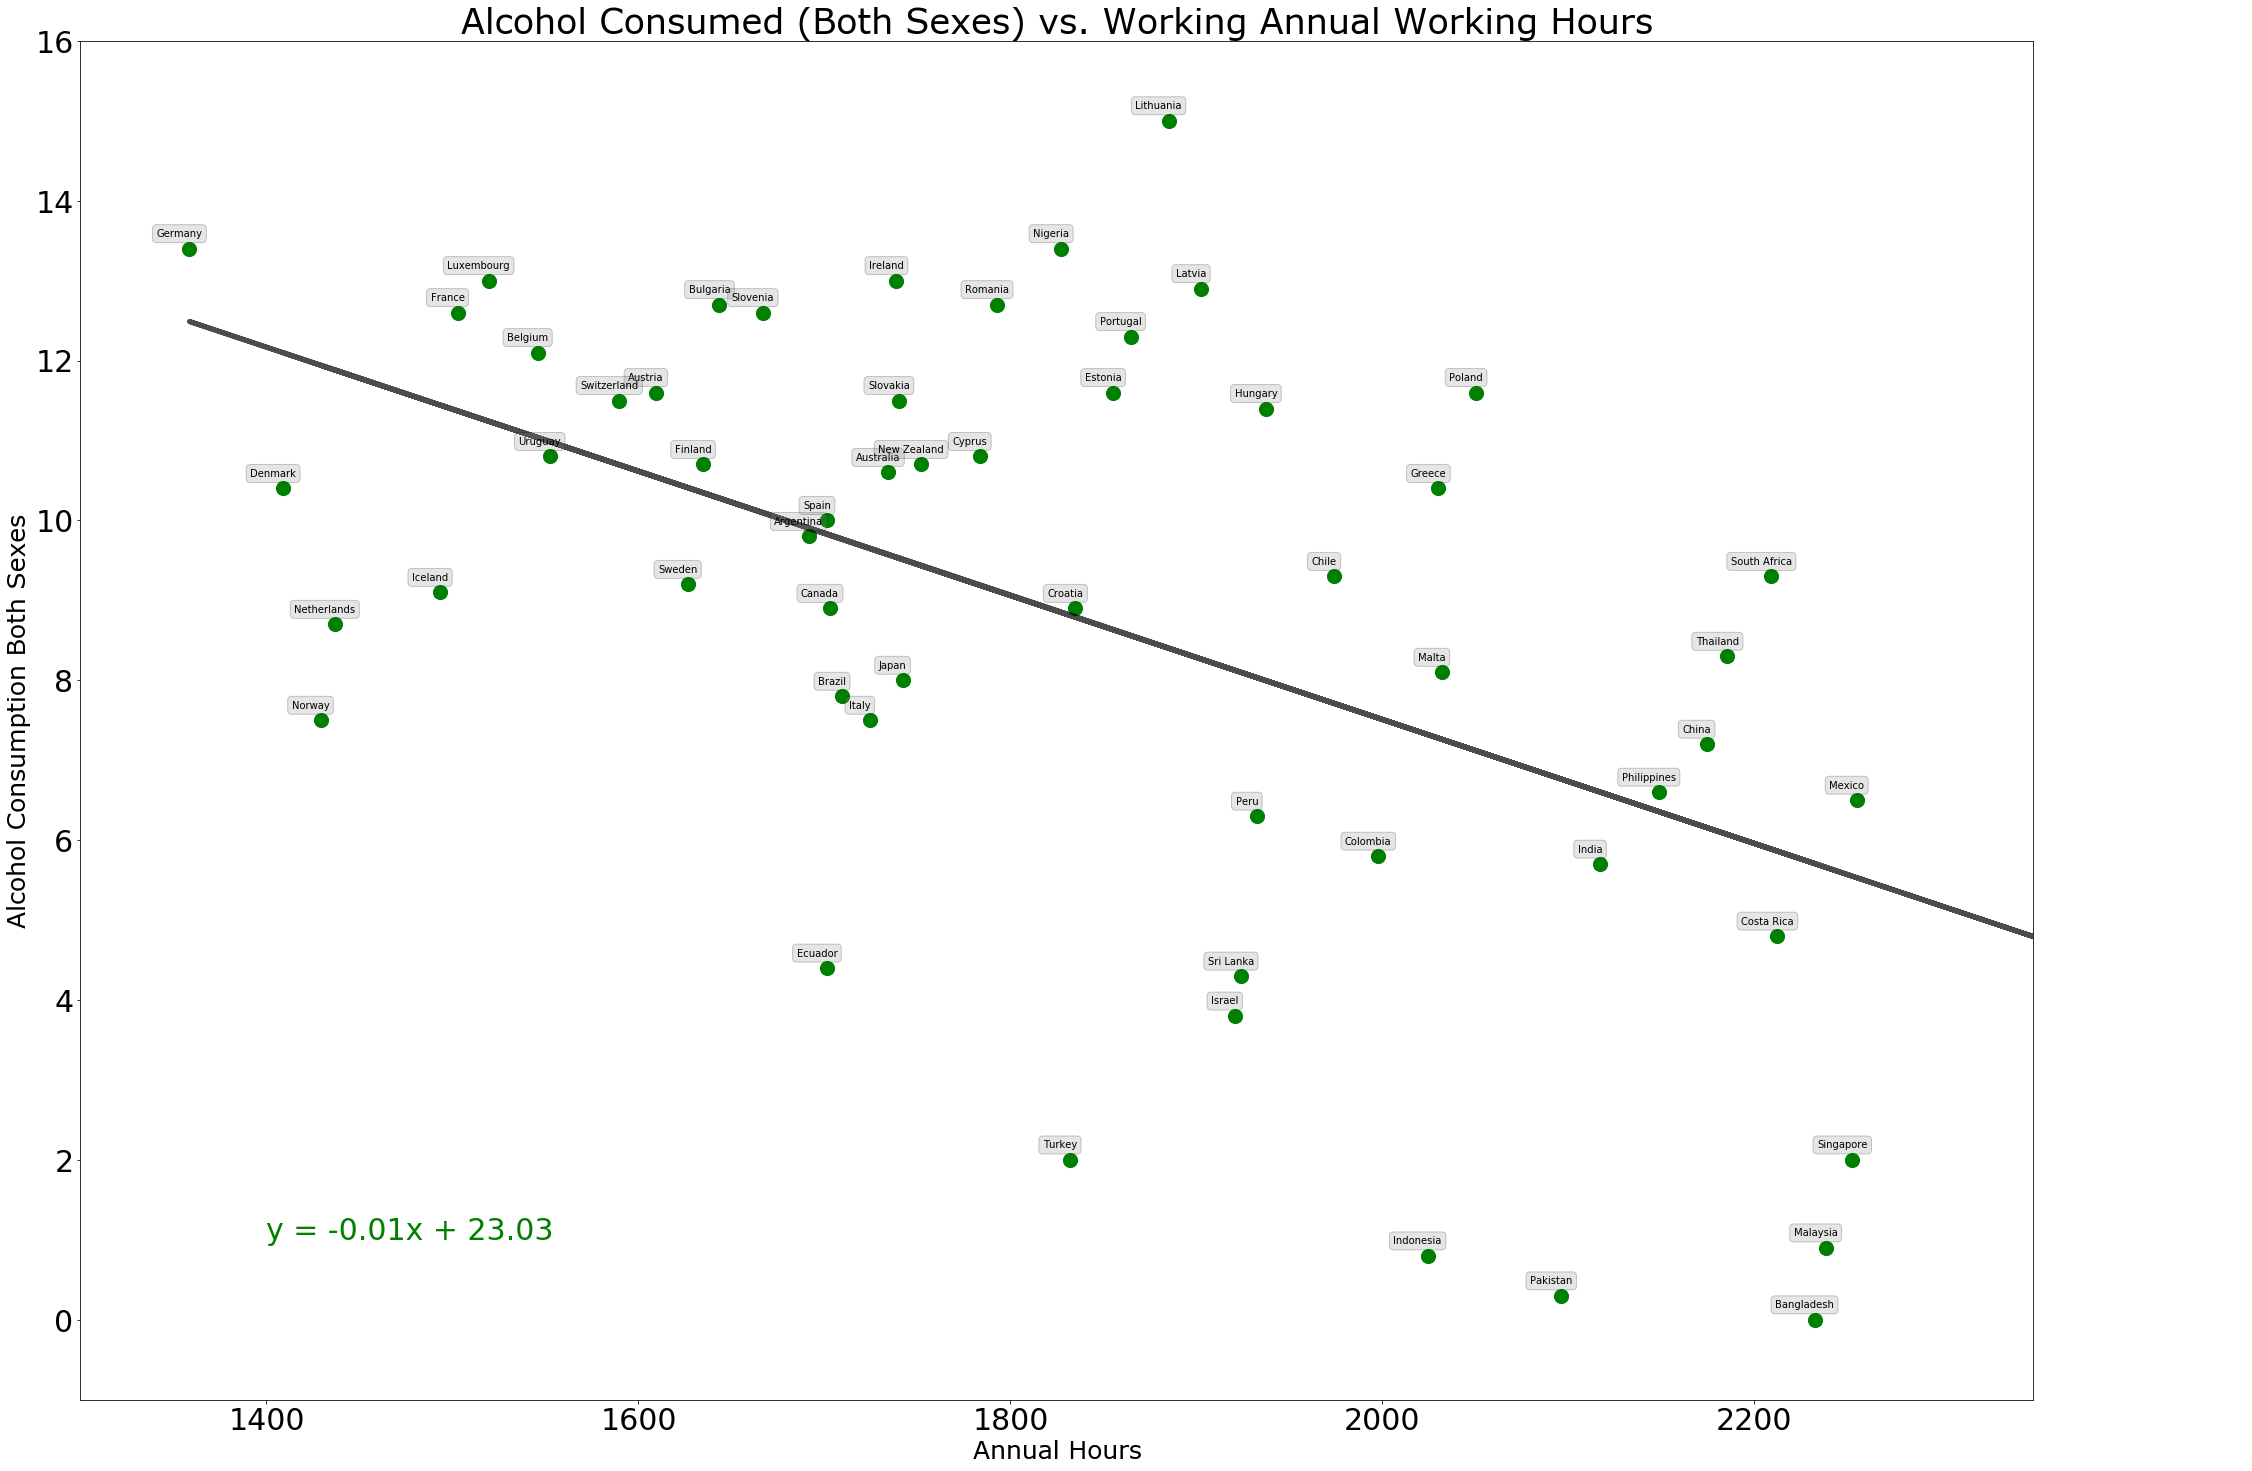

In [10]:
#construct a scatter plot for the relationship between the two factors 
labels = all_drink_hours_df["Country"]
x_values = all_drink_hours_df['Annual hours worked per person'].astype(float)
y_values = all_drink_hours_df[ 'Alcohol consumption both sexes'].astype(float)
plt.figure(figsize=(35,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(1300, 2350)
plt.ylim(-1, 16)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Alcohol Consumed (Both Sexes) vs. Working Annual Working Hours",fontsize=35,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=25,fontname ="Verdana")
plt.ylabel("Alcohol Consumption Both Sexes",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='green',marker="o",s=200)
plt.plot(x_values,regress_values,"r-",color="black",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1400,1),fontsize=30,color="green")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        )

print(f"The r-squared is: {rvalue**2}")
plt.savefig("alcohol_all_both.png")

The r-squared is: 0.2647695675847528


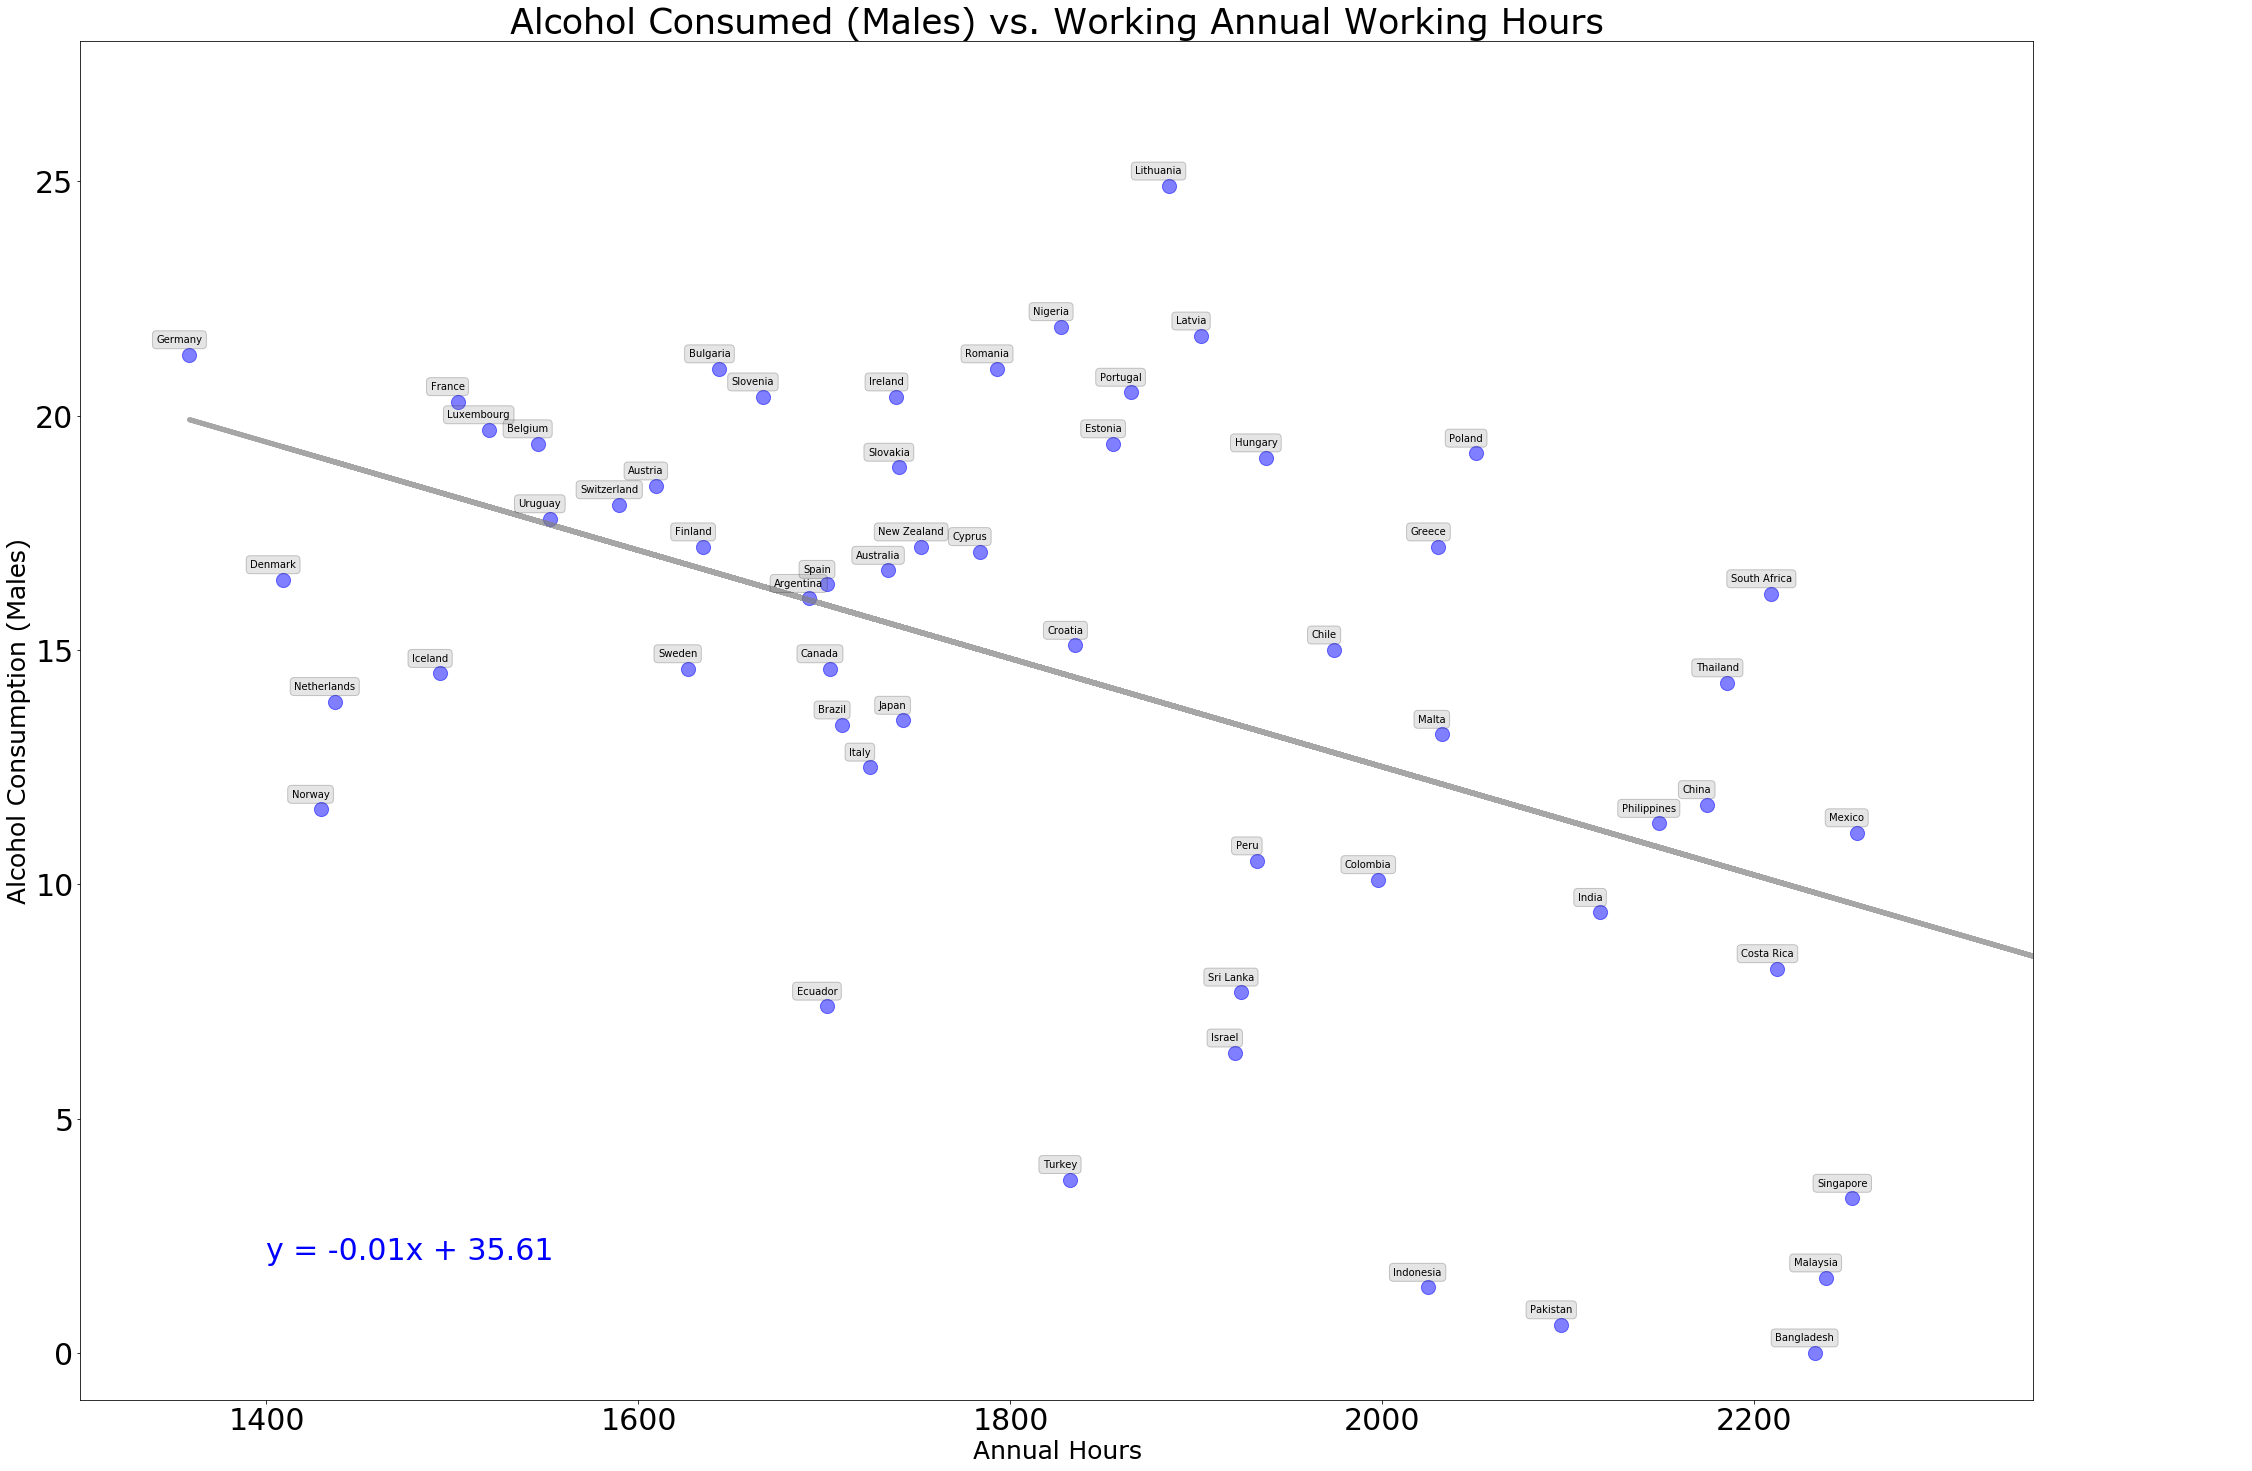

In [11]:
#create a scatter plot for males only 
labels = all_drink_hours_df["Country"]
x_values = all_drink_hours_df['Annual hours worked per person'].astype(float)
y_values = all_drink_hours_df[ 'Alcohol consumption males'].astype(float)

plt.figure(figsize=(35,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(1300, 2350)
plt.ylim(-1, 28)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Alcohol Consumed (Males) vs. Working Annual Working Hours",fontsize=35,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=25,fontname ="Verdana")
plt.ylabel("Alcohol Consumption (Males)",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='blue',alpha=0.5, marker="o",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1400,2),fontsize=30,color="blue")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        )


print(f"The r-squared is: {rvalue**2}")
plt.savefig("alcohol_all_males.png")

The r-squared is: 0.38636769860487746


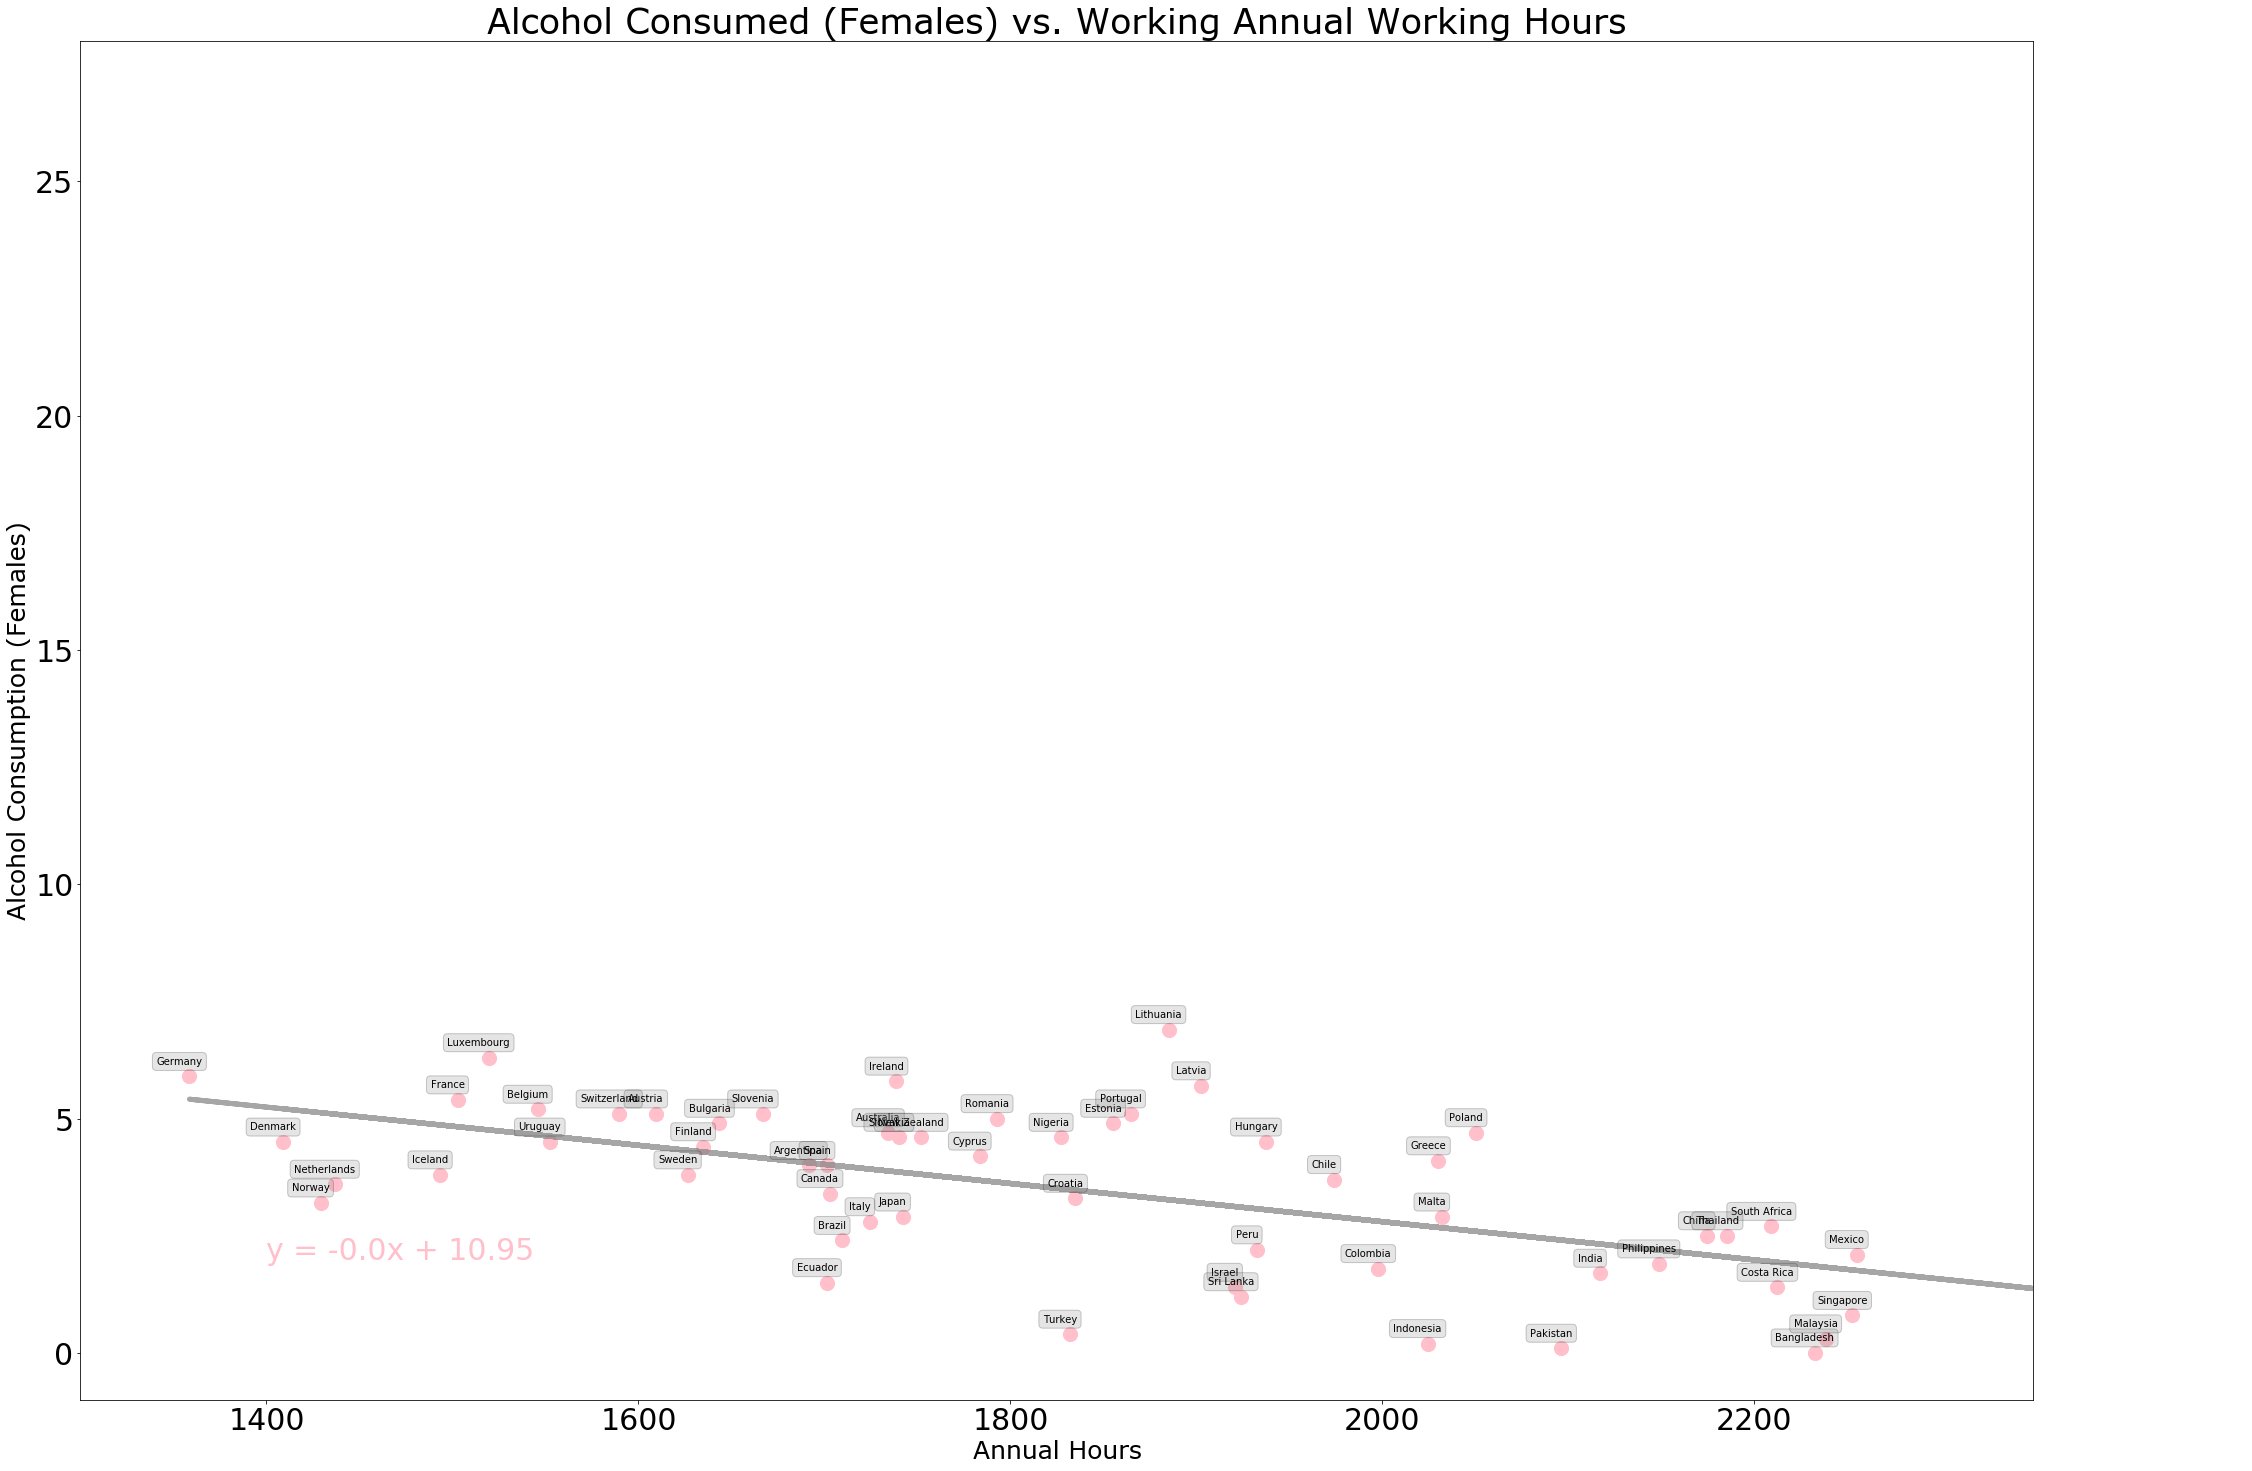

In [12]:
#create a scatter plot for females only 
labels = all_drink_hours_df["Country"]
x_values = all_drink_hours_df['Annual hours worked per person'].astype(float)
y_values = all_drink_hours_df[ 'Alcohol consumption females'].astype(float)

plt.figure(figsize=(35,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(1300, 2350)
plt.ylim(-1, 28)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Alcohol Consumed (Females) vs. Working Annual Working Hours",fontsize=35,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=25,fontname ="Verdana")
plt.ylabel("Alcohol Consumption (Females)",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='pink',marker="o",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1400,2),fontsize=30,color="pink")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        )


print(f"The r-squared is: {rvalue**2}")
plt.savefig("alcohol_all_females.png")